<a href="https://colab.research.google.com/github/plant-ai-biophysics-lab/AgML/blob/main/examples/AgML-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AgML Public Data Pipeline

One of the primary goals of AgML is the **synthesizing and standardization of public data sources** in the field of agricultural deep learning. To this end, we have standardized over 20 publicly available data sources across three primary deep learning tasks: *image classification*, *object detection*, and *semantic segmentation* (with more to come in the future).

AgML's public data pipeline is located in the `agml.data` module, which this tutorial will walk through.

In [ ]:
!pip install -q agml 

In [2]:
import agml
import agml.viz as viz

import numpy as np
from pprint import pprint

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


## Inspecting available sources

All of AgML's publicly available data sources can be inspected and filtered using the `agml.data.public_data_sources` method:





In [ ]:
pprint(agml.data.public_data_sources())

[bean_disease_uganda,
 carrot_weeds_germany,
 plant_seedlings_aarhus,
 soybean_weed_uav_brazil,
 sugarcane_damage_usa,
 crop_weeds_greece,
 sugarbeet_weed_segmentation,
 rangeland_weeds_australia,
 fruit_detection_worldwide,
 plant_weeds_denmark,
 leaf_counting_denmark,
 apple_detection_usa,
 cotton_seedling_counting,
 apple_detection_spain,
 fruit_detection_australia,
 datepalm_classification_saudi,
 mango_detection_australia,
 apple_flower_segmentation]


The list of datasets can then be filtered by a number of potential arguments, ranging from a threshold on the number of images, to the location the dataset was captured in, or the most common one, the deep learning task the dataset is designed for. For instance:

In [ ]:
# Filter datasets by their number of images and deep learning task.
pprint(agml.data.public_data_sources(ml_task = 'image_classification', n_images = '>1000'))

[bean_disease_uganda,
 datepalm_classification_saudi,
 leaf_counting_denmark,
 plant_seedlings_aarhus,
 rangeland_weeds_australia,
 soybean_weed_uav_brazil]


Once you've found the dataset you want, if you just want to download the dataset to your system, you can use the `agml.data.download_public_dataset` method to download it to the desired path. However, to actually work with the dataset, the next step is the `AgMLDataLoader`.

## Introduction to the AgMLDataLoader

The core of AgML's public data pipeline is the `AgMLDataLoader`, which facilitates access to these data sources in an easy-to-use and intuitive way for users of all skill levels and backgrounds.

The `AgMLDataLoader` is designed with the deep learning task of the dataset chosen in mind. The exact API of the loader will vary with the dataset that you've chosen (e.g., at the moment there are three distinct APIs for the three different supported tasks), although the methods and arguments mostly remain consistent. See the [documentation insert link here]() for more information. We'll start with an image classification dataset to demonstrate the general capabilities of the loader.

### Basic features and API usage

Instantiation of the `AgMLDataLoader` is as simple as just giving the name of the dataset you want to use. The loader will automatically search for the dataset in the default local path on your system, `~/.agml/datasets` (or a custom path provided in `dataset_path`), or download it to be loaded from disk on simultaneous runs.

For this walkthrough, we'll use the `bean_disease_uganda` dataset.

In [ ]:
loader = agml.data.AgMLDataLoader('bean_disease_uganda')

[AgML Download]: Downloading dataset `bean_disease_uganda` to /root/.agml/datasets/bean_disease_uganda.
[AgML Download]: Extracting files for bean_disease_uganda... Done!


*Note*: You can save the dataset to a custom path, so for example, in Google Colab, to your Google Drive, using the `dataset_path` argument as mentioned above:

In [3]:
# Mount Google Drive into Colab
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset into Google Drive
loader = agml.data.AgMLDataLoader('bean_disease_uganda', dataset_path = '/content/drive/MyDrive/AgMLData/')

Mounted at /content/drive
[AgML Download]: Downloading dataset `bean_disease_uganda` to /content/drive/MyDrive/AgMLData/bean_disease_uganda.
[AgML Download]: Extracting files for bean_disease_uganda... Done!


If you want to save future datasets into Google Drive, simply add the `dataset_path` argument as shown above to the `loader` instantiation.

We can access information about the dataset through its `info` parameter, such as the number of images, the image/annotation formats, or the location of the dataset. A summary of this info can be printed using `info.summary()`:

In [ ]:
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: bean_disease_uganda
Crop Types:
  1: angular_leaf_spot
  2: bean_rust
  3: healthy
Machine Learning Task: image_classification
Agricultural Task: disease_classification
Location:
  continent: africa
  country: uganda
Sensor Modality: rgb
Real Or Synthetic: real
Platform: handheld
Input Data Format: jpg
Annotation Format: directory_names
Number of Images: '1296'
Documentation: https://github.com/AI-Lab-Makerere/ibean/


For general purposes, the dataloader can be treated as an iterable object. We can extract the first image and its label as follows:

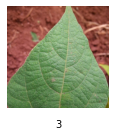

In [ ]:
image, label = loader[0]
_ = viz.visualize_images_with_labels(image, label)

The `AgMLDataLoader` interface exposes a number of methods to integrate into existing pipelines. For instance, if you want to batch the data in the loader, then simply use `loader.batch()`:

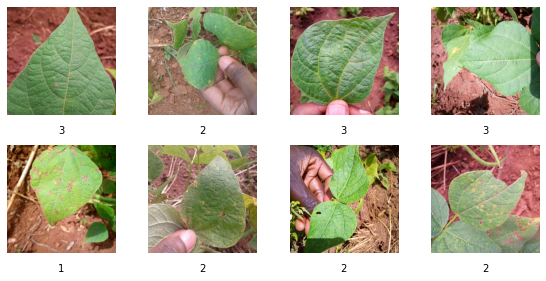

In [ ]:
loader.batch(8)
_ = viz.visualize_images_with_labels(loader[0])

Next, suppose we want to split the data into train, validation, and test pipelines (or some combination of the above). We can use `loader.split()`, specifying the split that we want, and then access the reduced data through `loader.training_data`, `loader.validation_data`, and `loader.test_data`. For example:

In [ ]:
# Un-batch the data for splitting.
loader.batch(None)

loader.split(train = 0.7, val = 0.2, test = 0.1)
train, val, test = loader.training_data, loader.validation_data, loader.test_data
print(
    f"Total Length:\t {len(loader)}\n"
    f"Train Length:\t {len(train)}\n"
    f"Val Length:\t {len(val)}\n"
    f"Test Length:\t {len(test)}"
)

Total Length:	 1296
Train Length:	 907
Val Length:	 259
Test Length:	 130


We can also shuffle the data to get a new random order of elements.

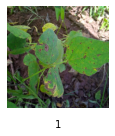

In [ ]:
loader.shuffle()
_ = viz.visualize_images_with_labels(loader[0])

The above API features are consistent across all of the different datasets. For instance, let's try instantiating a semantic segmentation dataset:

In [ ]:
loader = agml.data.AgMLDataLoader('apple_flower_segmentation')
loader.info.summary()

[AgML Download]: Downloading dataset `apple_flower_segmentation` to /root/.agml/datasets/apple_flower_segmentation.
[AgML Download]: Extracting files for apple_flower_segmentation... Done!
==================== DATASET SUMMARY ====================
Name: apple_flower_segmentation
Crop Types:
  1: apple
Machine Learning Task: semantic_segmentation
Agricultural Task: flower_segmentation
Location:
  continent: north_america
  country: usa
Sensor Modality: rgb
Real Or Synthetic: real
Platform: ground
Input Data Format: jpg
Annotation Format: image
Number of Images: '148'
Documentation: https://data.nal.usda.gov/dataset/data-multi-species-fruit-flower-detection-using-refined-semantic-segmentation-network


The `AgMLDataLoader` can be used as an iterable here as well:

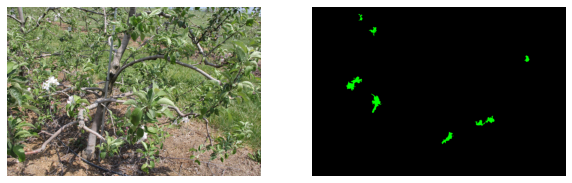

In [ ]:
image, annotation = loader[0]
_ = viz.visualize_image_and_mask(image, annotation)

And we can batch, split, and shuffle the data. For instance:

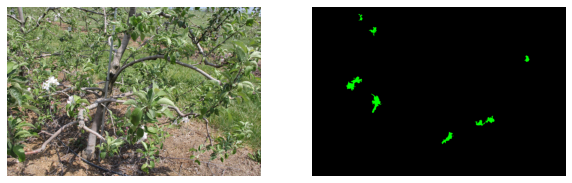

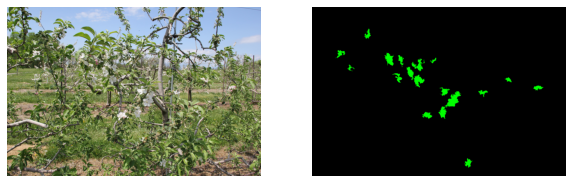

In [ ]:
loader.batch(8)
images, annotations = loader[0]
for image, annotation in zip(images[:2], annotations[:2]):
  image, annotation = np.squeeze(image), np.squeeze(annotation)
  _ = viz.visualize_image_and_mask(image, annotation)

### Differences with object detection datasets

Datasets for object detection function a bit differently. Namely, rather than mapping images with labels or annotation masks, images are mapped with a COCO JSON annotation dictionary, with the expectation that they will be then used in an anchor generation pipeline or something else.

Let's check out an object detection dataset.

In [ ]:
loader = agml.data.AgMLDataLoader('apple_detection_usa')
loader.info.summary()

[AgML Download]: Downloading dataset `apple_detection_usa` to /root/.agml/datasets/apple_detection_usa.
[AgML Download]: Extracting files for apple_detection_usa... Done!
==================== DATASET SUMMARY ====================
Name: apple_detection_usa
Crop Types:
  1: apple
Machine Learning Task: object_detection
Agricultural Task: fruit_detection
Location:
  continent: north_america
  country: usa
Sensor Modality: rgb
Real Or Synthetic: real
Platform: ground
Input Data Format: png
Annotation Format: coco_json
Number of Images: '2290'
Documentation: http://hdl.handle.net/2376/17721


We can extract the first element of the dataset by using it as an iterable:

{'area': array([20163, 17556, 21025, 11760, 10476, 14036]),
 'bboxes': array([[  54,  260,  143,  141],
       [  76,  493,  133,  132],
       [ 412,  470,  145,  145],
       [ 953,  222,  105,  112],
       [1101,  390,   97,  108],
       [ 626,   50,  116,  121]]),
 'image_id': array(52),
 'iscrowd': array([0, 0, 0, 0, 0, 0]),
 'labels': array([1, 1, 1, 1, 1, 1]),
 'segmentation': array([], shape=(6, 0), dtype=float64)}


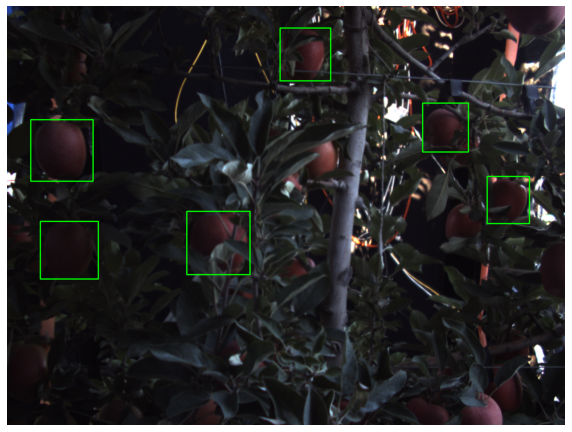

In [ ]:
image, coco_info = loader[0]
pprint(coco_info)
_ = viz.visualize_image_and_boxes(image, coco_info)

## TensorFlow and PyTorch integration

AgML's goal is to provide seamless integration into existing pipelines which traditionally make use of either TensorFlow or PyTorch. To this end, we provide a number of methods for integration with both frameworks, both within an AgML pipeline and within existing TensorFlow/PyTorch pipeline. 



### Applying transforms to input data

Data augmentation is a significant part of deep learning pipelines. The `transform()` method in the AgMLDataLoader provides users with the capability to apply data augmentation transforms to both image and annotation data, and using both TensorFlow or PyTorch pipelines. 

Let's start by looking at an image classificatication pipeline and apply a few `torchvision` transforms.



In [ ]:
import torchvision.transforms as T
 
loader = agml.data.AgMLDataLoader('bean_disease_uganda')
loader.transform(
    transform = T.Compose([T.ToTensor(), T.RandomHorizontalFlip(), T.RandomVerticalFlip()])
)

If we inspect the first image a few times, we'll notice that the image has been flipped randomly:

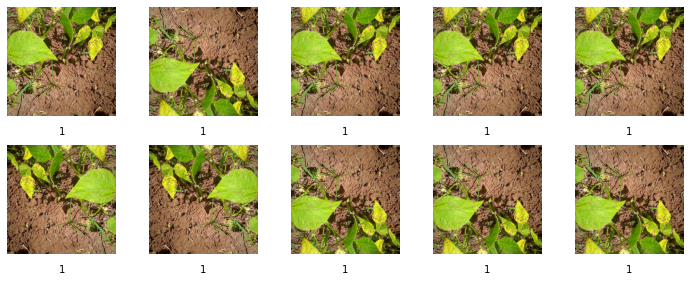

In [ ]:
transformed_images, labels = [], []
for _ in range(10):
  image, label = loader[0]
  transformed_images.append(image); labels.append(label)

_ = viz.visualize_images_with_labels(transformed_images, labels)

We can also use TensorFlow transforms, namely through the `keras.layers.experimental.preprocessing` layers wrapped in a `keras.Sequential` model.

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers.experimental.preprocessing as pl

loader.transform(
    transform = Sequential([pl.RandomFlip(), pl.RandomRotation(0.2)])
)

[AgML] 10-11-2021 22:45:49 WARNING - root: Switching backend to TensorFlow: got a TensorFlow preprocessing model while backend was set to PyTorch.


*Notice the message above informing us that the backend has been switched to TensorFlow. This is part of AgML's backend system, which will track the inputs being delivered and ensure that the correct internal conversions are being used for TensorFlow vs. PyTorch methods.*

Inspection of the loader now will yield similarly rotated and flipped images:


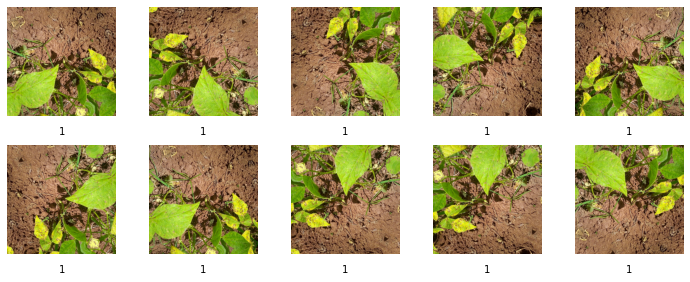

In [ ]:
transformed_images, labels = [], []
for _ in range(10):
  image, label = loader[0]
  transformed_images.append(image); labels.append(label)

_ = viz.visualize_images_with_labels(transformed_images, labels)

In general, to use any other type of method, such as augmentations from the `tf.image` module or custom functions, we can apply a transform function which takes in one input (the image), applies a transformation, and returns the output.

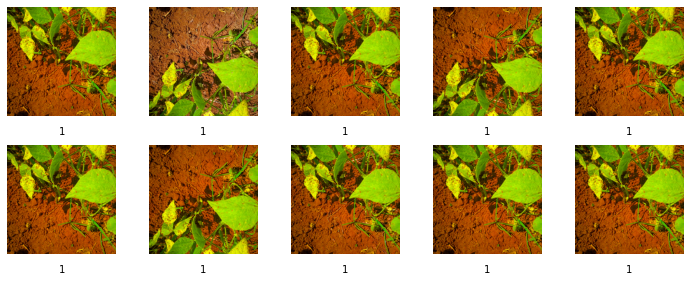

In [ ]:
import tensorflow as tf

loader.transform(
    transform = lambda image: tf.image.random_flip_up_down(tf.image.random_saturation(image, 1, 10))
)

transformed_images, labels = [], []
for _ in range(10):
  image, label = loader[0]
  transformed_images.append(image); labels.append(label)

_ = viz.visualize_images_with_labels(transformed_images, labels)

Transforms for semantic segmentation tasks include two additional arguments, namely `target_transform`, which is applied only to the output annotation mask, and `dual_transform`, which gets applied to both the image and its annotation. 

We will start with `dual_transform`, and a `torchvision.transform` pipeline. When using either `torchvision.transform`s or `keras.layers.experimental.preprocessing` layers, the pipeline passed to `dual_transform` should accept one image and return one transformed image, and will be applied with the same random seed to both the image and annotation target.

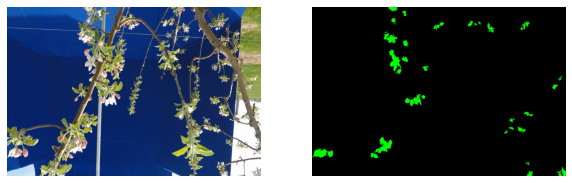

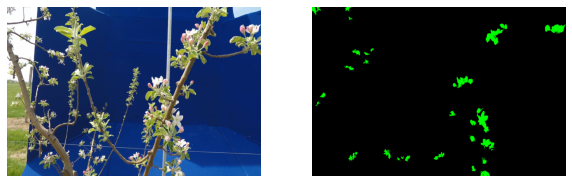

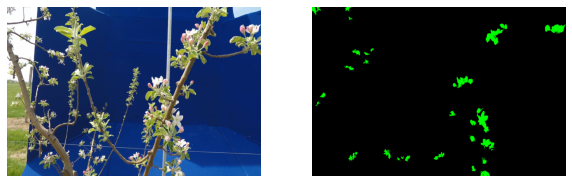

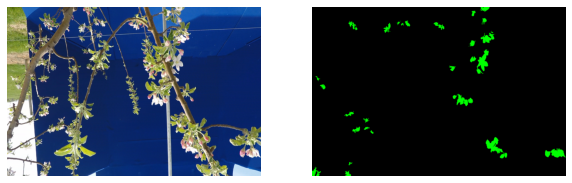

In [ ]:
loader = agml.data.AgMLDataLoader('apple_flower_segmentation')
loader.transform(
    dual_transform = T.Compose([T.ToTensor(), T.RandomVerticalFlip(), T.RandomHorizontalFlip()])
)

for _ in range(4):
  _ = viz.visualize_image_and_mask(loader[0])

We can apply a similar pipeline for `dual_transform` using `keras.layers.experimental.preprocessing` layers. We will use the `agml.data.experimental.generate_keras_segmentation_dual_transform`, as this will allow the same random seed to be applied to both the image and annotation layers:

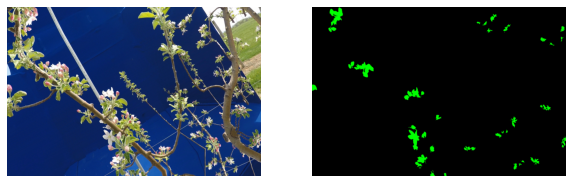

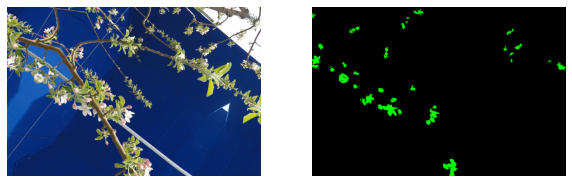

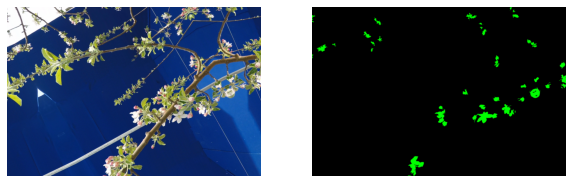

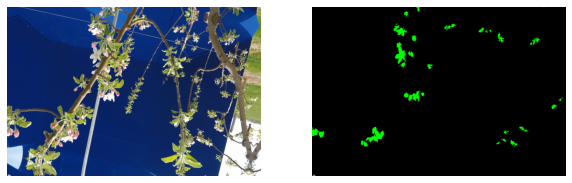

In [ ]:
loader.transform(
    dual_transform = agml.data.experimental.generate_keras_segmentation_dual_transform(
        Sequential([pl.RandomFlip(), pl.RandomRotation(0.2)])
    )
)

for _ in range(4):
  _ = viz.visualize_image_and_mask(loader[0])

We can also use a mix of the `transform` and `dual_transform` arguments, namely when applying visual augmentation to the input image and spatial augmentation to both the image and target annotation. This would function as follows:

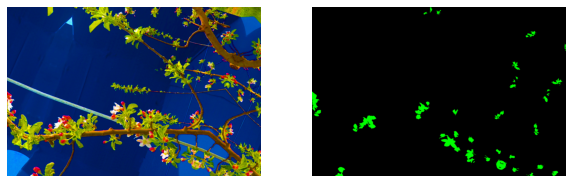

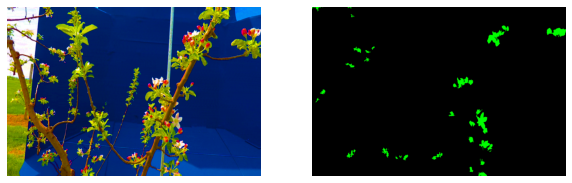

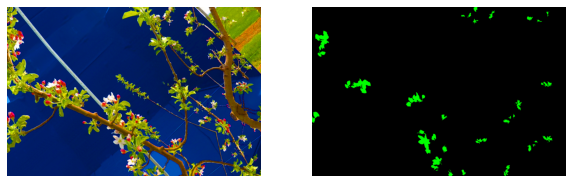

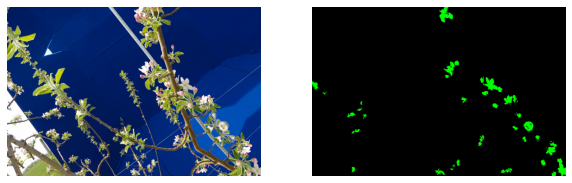

In [ ]:
loader.transform(
    transform = lambda image: tf.image.random_saturation(image, 1, 10),
    dual_transform = agml.data.experimental.generate_keras_segmentation_dual_transform(
        Sequential([pl.RandomFlip(), pl.RandomRotation(0.2)])
    )
)

for _ in range(4):
  _ = viz.visualize_image_and_mask(loader[0])

Object detection loaders work in a similar fashion, although there is no `target_transform` argument, only `transform` and `dual_transform`. Additionally, since they return a COCO JSON dictionary, the `dual_transform` argument only accepts a method which has two inputs (the image and COCO JSON dictionary) and two outputs (the transformed image and transformed COCO JSON dictionary).

### Using native TensorFlow and PyTorch datasets

The `AgMLDataLoader` contains a set of methods which allow for direct integration into PyTorch and TensorFlow training pipelines, which involves conversion of the data to native PyTorch/TensorFlow datasets. 

The first way this can be achieved is to use the `AgMLDataLoader` object directly in the training pipeline, but with a conversion to a `torch.utils.data.Dataset` or `keras.utils.Sequence` in order to function in the pipeline. This can be done as follows.


In [ ]:
import torch.utils.data

loader = agml.data.AgMLDataLoader('apple_flower_segmentation')
print(f"Is PyTorch Dataset: {isinstance(loader, torch.utils.data.Dataset)}")
loader.as_torch_dataset()
print(f"Is PyTorch Dataset: {isinstance(loader, torch.utils.data.Dataset)}")

Is PyTorch Dataset: False
Is PyTorch Dataset: True


In [ ]:
import tensorflow as tf

loader = agml.data.AgMLDataLoader('apple_flower_segmentation')
print(f"Is Keras Sequence: {isinstance(loader, tf.keras.utils.Sequence)}")
loader.as_keras_sequence()
print(f"Is Keras Sequence: {isinstance(loader, tf.keras.utils.Sequence)}")

Is Keras Sequence: False
Is Keras Sequence: True


This enables the `loader` object to be directly used in PyTorch/TensorFlow training pipelines, such as `tf.keras.Model.fit()`. However, the `AgMLDataLoader` contains two additional methods which are used to return native `torch.utils.data.DataLoader` and `tf.data.Dataset` objects: `loader.torch()`, and `loader.tensorflow()`, respectively.

Let's first inspect the `loader.torch()` method. This method returns a `torch.utils.data.DataLoader` which wraps a `torch.utils.data.Dataset` object that returns the contents of the loader itself. The method accepts a few arguments:

1. `image_size`: The standard size for all images. This is $(512, 512)$ by default.
2. Some combination of the `transform`, `target_transform`, and `dual_transform`, depending on the dataset being chosen. These arguments function exactly like they do in the `loader.transform()` method (see above for more information).
3. An arbitrary set of keyword arguments which mirror the keyword arguments for the instantiation of the `torch.utils.data.DataLoader`.

We can use this as follows:

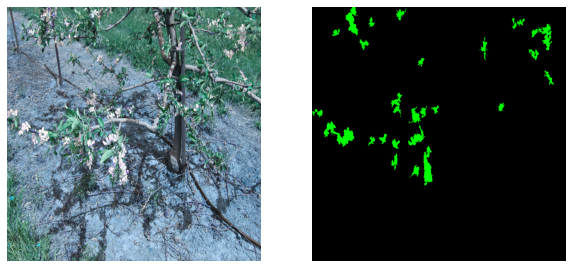

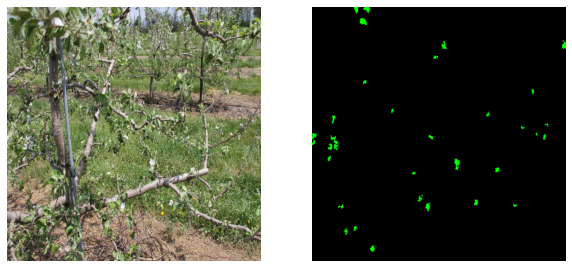

In [ ]:
# Don't need `T.ToTensor()` since images are now implicity converted to `torch.Tensor`s.
ds = loader.torch(
    dual_transform = T.Compose([T.RandomVerticalFlip(), T.RandomHorizontalFlip()]),
    batch_size = 2, shuffle = True
)

images, annotations = next(iter(ds))
for image, annotation in zip(images, annotations):
  _ = viz.visualize_image_and_mask(image, annotation)

The `loader.tensorflow()` method functions in a similar fashion, accepting the same arguments except for the loader keyword arguments, as the `tf.data.Dataset` object is pre-instantiated, shuffled, and mapped to preprocessing functions. We can use it as follows:

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


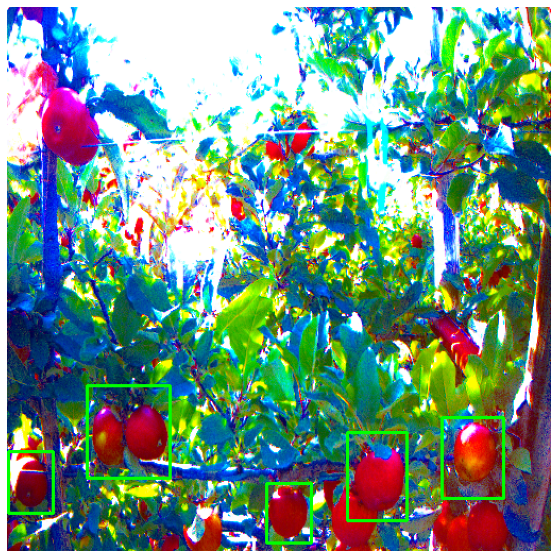

In [ ]:
loader = agml.data.AgMLDataLoader('apple_detection_usa')
ds = loader.tensorflow(
    transform = lambda image: tf.image.random_saturation(image, 1, 10)
)

_ = viz.visualize_image_and_boxes(next(iter(ds)))

## For experienced users

AgML provides a number of hooks for users to use AgML public data as they desire. While the `AgMLDataLoader` provides functionality for integrating with existing pipelines, experienced users who just want to get the data and process it in their own way can use the `loader.export_contents()` method.

For an image classification dataset, this will return two arrays mapping the images and their labels:

In [ ]:
classification_loader = agml.data.AgMLDataLoader('bean_disease_uganda')
contents = classification_loader.export_contents()
for i in range(10):
  print("Image: {}\n\tLabel: {}".format(contents[0][i], contents[1][i]))

Image: /root/.agml/datasets/bean_disease_uganda/bean_rust/bean_rust_train.88.jpg
	Label: 2
Image: /root/.agml/datasets/bean_disease_uganda/bean_rust/bean_rust_train.311.jpg
	Label: 2
Image: /root/.agml/datasets/bean_disease_uganda/angular_leaf_spot/angular_leaf_spot_train.122.jpg
	Label: 1
Image: /root/.agml/datasets/bean_disease_uganda/bean_rust/bean_rust_train.62.jpg
	Label: 2
Image: /root/.agml/datasets/bean_disease_uganda/healthy/healthy_train.339.jpg
	Label: 3
Image: /root/.agml/datasets/bean_disease_uganda/healthy/healthy_train.162.jpg
	Label: 3
Image: /root/.agml/datasets/bean_disease_uganda/angular_leaf_spot/angular_leaf_spot_train.60.jpg
	Label: 1
Image: /root/.agml/datasets/bean_disease_uganda/angular_leaf_spot/angular_leaf_spot_train.82.jpg
	Label: 1
Image: /root/.agml/datasets/bean_disease_uganda/angular_leaf_spot/angular_leaf_spot_train.326.jpg
	Label: 1
Image: /root/.agml/datasets/bean_disease_uganda/healthy/healthy_test.9.jpg
	Label: 3


A semantic segmentation dataset works similarly, instead mapping the image paths with the pixel-wise annotation mask paths.

In [ ]:
segmentation_loader = agml.data.AgMLDataLoader('apple_flower_segmentation')
contents = segmentation_loader.export_contents()
for i in range(10):
  print("Image: {}\n\tAnnotation: {}".format(contents[0][i], contents[1][i]))

Image: /root/.agml/datasets/apple_flower_segmentation/images/280.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/280.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/292.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/292.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/336.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/336.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/281.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/281.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/351.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/351.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/331.jpg
	Annotation: /root/.agml/datasets/apple_flower_segmentation/annotations/331.png
Image: /root/.agml/datasets/apple_flower_segmentation/images/262.jpg
	Annotation: /root/.agml/datasets/app

The object detection loader exposes three methods for exporting contents:

1. `loader.export_contents()`: This method exports a dictionary which maps the image paths to their corresponding COCO JSON annotations.
2. `loader.export_coco()`: This method returns the complete COCO JSON contents of the annotations file, which can be paired with `loader.dataset_root` for use in a `pycocotools.COCO` or `torchvision.datasets.CocoDetection` dataset.
3. `loader.export_bboxes_and_labels()`: This method returns a similar mapping to the first case, but instead of the complete COCO JSON annotations, it just returns the bounding boxes and category labels.

As an example of the first case:

In [ ]:
detection_loader = agml.data.AgMLDataLoader('apple_detection_usa')
contents = detection_loader.export_contents()
for image, annotation in list(contents.items())[:5]:
  print("Image: {}\n\tAnnotation: {}".format(image, annotation))

Image: Robot2017_image-278.png
	Annotation: [{'area': 7565, 'iscrowd': 0, 'bbox': [523, 876, 89, 85], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 0}, {'area': 8835, 'iscrowd': 0, 'bbox': [257, 815, 93, 95], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 1}, {'area': 8280, 'iscrowd': 0, 'bbox': [344, 531, 92, 90], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 2}, {'area': 7224, 'iscrowd': 0, 'bbox': [475, 517, 84, 86], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 3}, {'area': 9300, 'iscrowd': 0, 'bbox': [546, 521, 93, 100], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 4}, {'area': 8008, 'iscrowd': 0, 'bbox': [652, 557, 91, 88], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 5}, {'area': 7920, 'iscrowd': 0, 'bbox': [699, 651, 88, 90], 'category_id': 1, 'ignore': 0, 'segmentation': [], 'image_id': 551, 'id': 6}, {'area': 

## Additional features and tools

The `agml.data` module contains a few additional features for convenience and formatting. The first main feature, `agml.data.download_public_dataset`, is for users who just want to download a dataset to a local path without actually using the `AgMLDataLoader`:

In [ ]:
import os

agml.data.download_public_dataset('cotton_seedling_counting', '/content/cotton_seedling_counting')
print("Directory Contents: " + str(os.listdir('/content/cotton_seedling_counting')))

[AgML Download]: Extracting files for cotton_seedling_counting... Done!
Directory Contents: ['annotations.json', 'images']


Additionally, the module includes convenience functions for working with COCO JSON annotations:

1. `coco_to_bboxes`: Extracts the bounding boxes and category labels from a COCO JSON dictionary or list of COCO JSON annotation dictionaries.
2. `convert_bbox_format`: Converts bounding box formats to the COCO JSON format (x1, y1, width, height).

For the first example:

In [ ]:
loader = agml.data.AgMLDataLoader('apple_detection_usa')
print(agml.data.coco_to_bboxes(loader[0][1]))

(array([[ 315,    3,  125,  127],
       [1187,  617,   94,  107]]), array([1, 1]))


And for an example of `convert_bbox_format`:

In [ ]:
# Suppose we have a bounding box in the format (x_min, y_min, x_max, y_max):
bbox = [100, 200, 500, 700]

# We can convert this to the correct format using the `fmt` argument.
print(agml.data.convert_bbox_format(bbox, ['x_min', 'y_min', 'x_max', 'y_max']))

[100 700 400 500]


## Next Steps

From here, you are ready to use the `agml.data` API to access public agricultural datasets and use them in deep learning training and evaluation pipelines. Check out the AgML documentation for more information about the module.